In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import scipy
from scipy import stats
import scipy.signal

In [3]:
from megabouts_helper import labels_cat, color, color_bouts, cmp_bouts, color_ipsi_cont
from preprocess_helper import resort_ipsi_contra_traces, sort_ipsi_contra_arrays, reshape_feature_array, get_ipsi_contra_col

In [4]:
sns.set_theme(style="white", palette="pastel")

In [5]:
save_figure_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_3\supp\suppl_7')

In [6]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')
path_tensors = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data\tensors\tensor.h5')
path_features = Path(master_path/ 'features_ipsi_contra.csv')
laterality = fl.load(master_path/ 'features'/'bout_laterality.h5')
master_path, path_features

(WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data'),
 WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features_ipsi_contra.csv'))

In [7]:
### tail, fin 1, fin 2, left eye, right eye

traces =  fl.load(path_tensors)
traces.shape

(11063, 3, 50)

In [8]:
tail = traces[:, 0, :]

fin_1 = traces[:, 1, :]
fin_2 = traces[:, 2, :]

In [9]:
features = pd.read_csv(path_features)
features.head()

,Unnamed: 0.1,Unnamed: 0,exp,fish_id,bout_angle,cluster,frame_start,frame_end,bout_id_orig,mb_proba,...,ipsi_peak_vigor,contra_peak_vigor,ipsi_freqs,contra_freqs,ipsi_osc,contra_osc,ipsi_duration,contra_duration,ipsi_max_freqs,contra_max_freqs
0,0,0,13052024_visstim_2D_round,240513_f0,3.000171,0,18375,18410,78,0.806645,...,0.244681,0.164076,0.109756,0.105263,4,3,28.0,27.0,0.166667,0.166667
1,1,1,13052024_visstim_2D_round,240513_f0,1.649302,0,19461,19484,80,1.000000,...,0.163745,0.128555,0.119048,0.117647,2,2,19.0,15.0,0.250000,0.166667
2,2,2,13052024_visstim_2D_round,240513_f0,-0.861132,0,19661,19689,81,1.000000,...,0.219439,0.184779,0.104167,0.115385,3,2,27.0,16.0,0.125000,0.166667
3,3,3,13052024_visstim_2D_round,240513_f0,0.870591,0,20257,20292,84,1.000000,...,0.209418,0.198009,0.117647,0.117647,4,2,35.0,16.0,0.125000,0.166667
4,4,4,13052024_visstim_2D_round,240513_f0,2.231631,0,20824,20859,86,1.000000,...,0.220615,0.185247,0.103448,0.116667,3,3,22.0,23.0,0.125000,0.125000


In [10]:
clusters = features.cluster

In [11]:
ipsi_fin_values = features.ipsi_fin.values
ipsi_fin_values

array([1., 1., 1., ..., 0., 0., 1.])

#### Read in amplitudes

In [12]:
t_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/ 't_feature_vector_array.h5')
l_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/ 'l_feature_vector_array.h5')
r_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/ 'r_feature_vector_array.h5')

In [13]:
max_n=9

reshaped_array, peaks_a_array, peaks_i_array, valleys_a_array, valleys_i_array = reshape_feature_array(t_feature_vector_array)
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)

Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)


#### Get max amplitude of fin

In [14]:
l_max_amp = np.nanmax(l_peaks_a_array,axis=1)
r_max_amp = np.nanmax(r_peaks_a_array,axis=1)

In [15]:
ipsi_max_amp, contra_max_amp = sort_ipsi_contra_arrays(l_max_amp, r_max_amp ,ipsi_fin_values)
print("Ipsi Fin:", ipsi_max_amp)
print("Contra Fin:", contra_max_amp)

Ipsi Fin: [0.79801677 0.43274088 0.62083456 ... 1.26080514 0.64067321 1.36819546]
Contra Fin: [0.34069676 0.29622418 0.43147306 ... 1.08446517 0.89021497 1.23555878]


### amplitude 1st and 2nd peak

In [16]:
ipsi_amp_1, contra_amp_1 = sort_ipsi_contra_arrays(l_peaks_a_array[:,0], r_peaks_a_array[:,0] ,ipsi_fin_values)
print("Ipsi Fin:", ipsi_amp_1)
print("Contra Fin:", contra_amp_1)

Ipsi Fin: [0.4658321  0.43274088 0.3699068  ... 1.26080514 0.63463401 0.79530287]
Contra Fin: [0.26367705 0.15105229 0.43147306 ... 1.08446517 0.89021497 0.94328971]


In [17]:
ipsi_amp_2, contra_amp_2 = sort_ipsi_contra_arrays(l_peaks_a_array[:,1], r_peaks_a_array[:,1] ,ipsi_fin_values)
print("Ipsi Fin:", ipsi_amp_2)
print("Contra Fin:", contra_amp_2)

Ipsi Fin: [0.6767425  0.28378939 0.61507116 ... 1.01273561 0.36239789 0.66408094]
Contra Fin: [0.34069676 0.29622418 0.34829441 ...        nan 0.39322634 0.76667777]


### Get difference in amplitude 1st and 2nd peak

In [18]:
l_diff_peaks = np.diff(l_peaks_a_array, axis=1)[:,0]
r_diff_peaks = np.diff(r_peaks_a_array, axis=1)[:,0]

In [19]:
# l_peaks_a_array.shape

In [20]:
ipsi_diff_peaks, contra_diff_peaks = sort_ipsi_contra_arrays(l_diff_peaks, r_diff_peaks ,ipsi_fin_values)
print("Ipsi Fin:", ipsi_diff_peaks)
print("Contra Fin:", contra_diff_peaks)

Ipsi Fin: [ 0.2109104  -0.14895148  0.24516436 ... -0.24806953 -0.27223612
 -0.13122193]
Contra Fin: [ 0.07701971  0.14517189 -0.08317865 ...         nan -0.49698863
 -0.17661194]


In [21]:
ipsi_diff_peaks.shape

(11063,)

#### Beats and halfbeats 

In [22]:
tail_periods_array = fl.load(master_path/ 'features'/ 't_full_beats.h5')
tail_half_beats_array = fl.load(master_path/ 'features'/ 't_half_beats.h5')

l_periods_array = fl.load(master_path/ 'features'/ 'l_full_beats.h5')
l_half_beats_array = fl.load(master_path/ 'features'/ 'l_half_beats.h5')

r_periods_array = fl.load(master_path/ 'features'/ 'r_full_beats.h5')
r_half_beats_array = fl.load(master_path/ 'features'/ 'r_half_beats.h5')

In [23]:
### Get diff between 

In [24]:
t_peaks_diff = tail_periods_array[:,0]
l_peaks_diff = l_periods_array[:,0]
r_peaks_diff = r_periods_array[:,0]

In [25]:
ipsi_peak_diff_1, contra_peak_diff_1 = sort_ipsi_contra_arrays(l_peaks_diff, r_peaks_diff ,ipsi_fin_values)
print("Ipsi Fin:", ipsi_peak_diff_1)
print("Contra Fin:", contra_peak_diff_1)

Ipsi Fin: [0.04  0.04  0.045 ... 0.04  0.03  0.035]
Contra Fin: [0.045 0.035 0.045 ...   nan 0.05  0.045]


In [26]:
ipsi_peak_diff_2, contra_peak_diff_2 = sort_ipsi_contra_arrays(l_peaks_diff, r_peaks_diff ,ipsi_fin_values)
print("Ipsi Fin:", ipsi_peak_diff_2)
print("Contra Fin:", contra_peak_diff_2)

Ipsi Fin: [0.04  0.04  0.045 ... 0.04  0.03  0.035]
Contra Fin: [0.045 0.035 0.045 ...   nan 0.05  0.045]


### Rework Dataframe into ipsi contra format

In [27]:
ipsi_durations, contra_durations = get_ipsi_contra_col(features, 'l_fin_duration', 'r_fin_duration', 'ipsi_fin')
print("Ipsi Fin:", ipsi_durations)
print("Contra Fin:", contra_durations)

Ipsi Fin: [28. 19. 27. ... 27. 23. 32.]
Contra Fin: [27. 15. 16. ...  8. 21. 34.]


In [28]:
ipsi_freqs, contra_freqs = get_ipsi_contra_col(features, 'l_fin_freqs', 'r_fin_freqs', 'ipsi_fin')
print("Ipsi Fin:", ipsi_freqs)
print("Contra Fin:", contra_freqs)

Ipsi Fin: [0.1097561  0.11904762 0.10416667 ... 0.13636364 0.12962963 0.11428571]
Contra Fin: [0.10526316 0.11764706 0.11538462 ... 0.13636364 0.11538462 0.109375  ]


In [29]:
ipsi_osc, contra_osc = get_ipsi_contra_col(features, 'l_osc', 'r_osc', 'ipsi_fin')
print("Ipsi Fin:", ipsi_osc)
print("Contra Fin:", contra_osc)

Ipsi Fin: [4 2 3 ... 3 3 4]
Contra Fin: [3 2 2 ... 1 3 4]


#### Get corr ipsi contra fin

In [30]:
path_tensors_ipsi = Path(master_path/ 'tensors'/ 'tensor_ipsi_contra.h5')

In [31]:
traces =  fl.load(path_tensors_ipsi)
traces.shape

(11063, 3, 50)

In [32]:
ipsi_fin = traces[:, 1, :]
contra_fin = traces[:, 2, :]


In [33]:
ispi_contra_corr = np.full((traces.shape[0], 1), np.nan)

for bout in range(traces.shape[0]):
    cross_ipsi_contra = np.corrcoef(ipsi_fin[bout, :], contra_fin[bout, :])
    ispi_contra_corr[bout] = cross_ipsi_contra[0][1]

In [34]:
ispi_contra_corr = ispi_contra_corr.flatten()

## Make Heatmap

In [35]:
column_names =  [
    'ipsi_n_oscillation', 'contra_n_oscillation',
    'ipsi_frequency', 'contra_frequency',
    'ipsi_max_amplitude', 'contra_max_amplitude', 
    'ipsi_fin_duration', 'contra_fin_duration',
    'ipsi_amp_diff_peaks', 'contra_amp_diff_peaks',
    'ipsi_amp_1', 'contra_amp_1',
    'ipsi_amp_2', 'contra_amp_2',
    'ipsi_t_diff_peak_1', 'contra_t_diff_peak_1',
    'ipsi_t_diff_peak_2', 'contra_t_diff_peak_2',
    'ispi_contra_correlation']



In [36]:

df = pd.DataFrame(np.asarray([
    ipsi_osc, contra_osc,
    ipsi_freqs, contra_freqs,
    ipsi_max_amp, contra_max_amp, 
    ipsi_durations, contra_durations, 
    ipsi_diff_peaks, contra_diff_peaks,
    ipsi_amp_1, contra_amp_1,
    ipsi_amp_2, contra_amp_2,
    ipsi_peak_diff_1, contra_peak_diff_2,
    ipsi_peak_diff_2, contra_peak_diff_2,
    ispi_contra_corr]).T, columns=column_names)

df.head()

,ipsi_n_oscillation,contra_n_oscillation,ipsi_frequency,contra_frequency,ipsi_max_amplitude,contra_max_amplitude,ipsi_fin_duration,contra_fin_duration,ipsi_amp_diff_peaks,contra_amp_diff_peaks,ipsi_amp_1,contra_amp_1,ipsi_amp_2,contra_amp_2,ipsi_t_diff_peak_1,contra_t_diff_peak_1,ipsi_t_diff_peak_2,contra_t_diff_peak_2,ispi_contra_correlation
0,4.0,3.0,0.109756,0.105263,0.798017,0.340697,28.0,27.0,0.210910,0.077020,0.465832,0.263677,0.676743,0.340697,0.040,0.045,0.040,0.045,0.138358
1,2.0,2.0,0.119048,0.117647,0.432741,0.296224,19.0,15.0,-0.148951,0.145172,0.432741,0.151052,0.283789,0.296224,0.040,0.035,0.040,0.035,-0.085082
2,3.0,2.0,0.104167,0.115385,0.620835,0.431473,27.0,16.0,0.245164,-0.083179,0.369907,0.431473,0.615071,0.348294,0.045,0.045,0.045,0.045,0.011863
3,4.0,2.0,0.117647,0.117647,0.569168,0.534200,35.0,16.0,0.173791,0.010773,0.395376,0.523427,0.569168,0.534200,0.040,0.035,0.040,0.035,0.129337
4,3.0,3.0,0.103448,0.116667,0.606922,0.503003,22.0,23.0,0.039418,0.119273,0.567504,0.251714,0.606922,0.370987,0.040,0.040,0.040,0.040,-0.017081


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Standard Scaling using sklearn
# scaler = StandardScaler()
scaler = MinMaxScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# print(df_standardized)


In [38]:
tick_borders = []
add = 0
for i in range(11):
    n = features[features.cluster ==i].shape[0]
    add += n
    tick_borders.append(add)

print (tick_borders)

[1572, 2066, 4162, 5124, 6952, 9056, 10582, 10803, 10809, 11031, 11063]


In [39]:
df.to_csv(master_path /'heatmap_features.csv', index=False)
df_standardized.to_csv(master_path /'heatmap_norm.csv', index=False)

In [40]:
df_standardized['cluster'] = clusters

In [41]:
# Group by 'cluster' column and calculate the mean for each group
cluster_means = df_standardized.groupby('cluster').mean()

In [42]:
catname = np.array(['AS', 'S1', 'S2', 'BS', 'JT', 'HAT', 'RT', 'SAT',
       'OB', 'LLC', 'SLC'])

In [43]:
alph=0.03
dot_size=1
cm = 1/2.54  # centimeters in inches
f_size = 6
dpi=600
lw=0.5

## Plot

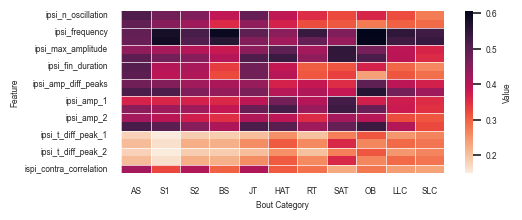

In [48]:
# Plotting the transposed heatmap
fig, ax = plt.subplots(figsize=(14*cm, 6*cm), facecolor='None')
sns.heatmap(cluster_means.T, ax=ax, annot=False, cmap='rocket_r',cbar_kws={'label': 'Value'})

# Adjust the y-axis
ax.set_xlabel('Bout Category', fontsize=f_size)
ax.set_xticklabels(catname, rotation=0, fontsize=f_size)
# Adjust the y-axis
ax.set_ylabel('Feature', fontsize=f_size)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=f_size)

# Adjust the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=f_size)  # Set the font size for colorbar tick labels
cbar.set_label('Value', fontsize=f_size)  # Set the font size for the colorbar label

ax.axhline(2, c='w', lw=lw)
ax.axhline(4, c='w', lw=lw)
ax.axhline(6, c='w', lw=lw)
ax.axhline(8, c='w', lw=lw)
ax.axhline(10, c='w', lw=lw)
ax.axhline(12, c='w', lw=lw)
ax.axhline(14, c='w', lw=lw)
ax.axhline(16, c='w', lw=lw)
ax.axhline(18, c='w', lw=lw)
ax.axhline(20, c='w', lw=lw)

for i in range(11):
    ax.axvline(i, c='w', lw=lw)
    
plt.tight_layout()
fig.savefig(save_figure_path /'heatmap_features_bout_cat_mean.pdf', dpi=dpi)
fig.savefig(save_figure_path /'heatmap_features_bout_cat_mean.png', dpi=dpi)

In [45]:
# # Plotting the transposed heatmap
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(df_standardized, ax=ax, annot=False, cmap='rocket_r')
# for i in tick_borders:
#     ax.axhline(i, c='w', lw=2)

# # Adjust the y-axis
# ax.set_ylabel('Bout category')
# ax.set_yticks([0]+tick_borders)
# ax.set_yticklabels(labels_cat+[0], rotation=0)

# plt.title('heatmap')
# plt.tight_layout()

# fig.savefig(save_figure_path /'heatmap_features_bout_cat_allbouts.pdf', dpi=300)
# fig.savefig(save_figure_path /'heatmap_features_bout_cat_allbouts.png', dpi=300)